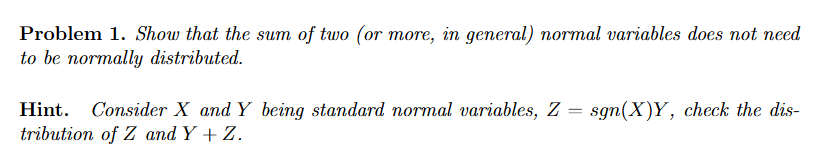

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, kstest, levy_stable
import statsmodels.api as sm

In [2]:
X = np.random.normal(0, 1, 10000)
Y = np.random.normal(0, 1, 10000)

In [3]:
Z = np.sign(X)*Y

(array([0.00213625, 0.0008545 , 0.00299075, 0.00726324, 0.01068123,
        0.0337527 , 0.05255167, 0.0675054 , 0.11535733, 0.15850952,
        0.21618818, 0.26147662, 0.3080468 , 0.35290798, 0.39520567,
        0.39905092, 0.36743446, 0.36957071, 0.30291981, 0.24908639,
        0.18756248, 0.14697379, 0.10595785, 0.06451466, 0.04443394,
        0.02392597, 0.01538098, 0.00640874, 0.0025635 , 0.00128175]),
 array([-3.60264449, -3.36858914, -3.1345338 , -2.90047846, -2.66642311,
        -2.43236777, -2.19831242, -1.96425708, -1.73020173, -1.49614639,
        -1.26209104, -1.0280357 , -0.79398035, -0.55992501, -0.32586966,
        -0.09181432,  0.14224103,  0.37629637,  0.61035172,  0.84440706,
         1.07846241,  1.31251775,  1.5465731 ,  1.78062844,  2.01468379,
         2.24873913,  2.48279448,  2.71684982,  2.95090516,  3.18496051,
         3.41901585]),
 <BarContainer object of 30 artists>)

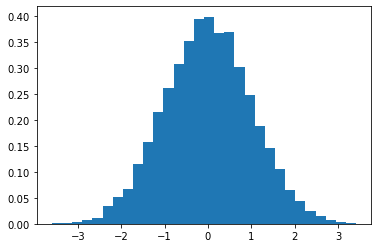

In [7]:
plt.hist(Z, bins=30, density=True)

In [9]:
Ź = Y + Z

(array([6.44978710e-04, 0.00000000e+00, 1.07496452e-03, 2.36492194e-03,
        3.65487936e-03, 9.88967356e-03, 1.52644961e-02, 1.82743968e-02,
        2.94540278e-02, 3.82687368e-02, 5.56831620e-02, 7.46025375e-02,
        7.84724097e-02, 9.15869769e-02, 9.61018278e-02, 1.16268162e+00,
        8.98670336e-02, 8.94370478e-02, 7.91173885e-02, 6.12729775e-02,
        4.96633607e-02, 3.74087652e-02, 2.79490774e-02, 1.31145671e-02,
        1.22545955e-02, 6.23479420e-03, 3.00990065e-03, 1.28995742e-03,
        1.07496452e-03, 2.14992903e-04]),
 array([-7.11591725, -6.65078561, -6.18565398, -5.72052235, -5.25539072,
        -4.79025909, -4.32512745, -3.85999582, -3.39486419, -2.92973256,
        -2.46460093, -1.9994693 , -1.53433766, -1.06920603, -0.6040744 ,
        -0.13894277,  0.32618886,  0.7913205 ,  1.25645213,  1.72158376,
         2.18671539,  2.65184702,  3.11697865,  3.58211029,  4.04724192,
         4.51237355,  4.97750518,  5.44263681,  5.90776845,  6.37290008,
         6.83803

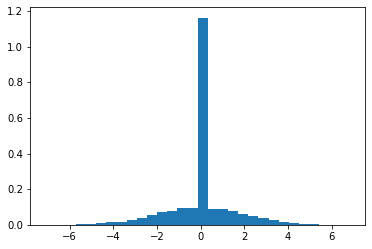

In [10]:
plt.hist(Ź, bins=30, density=True)

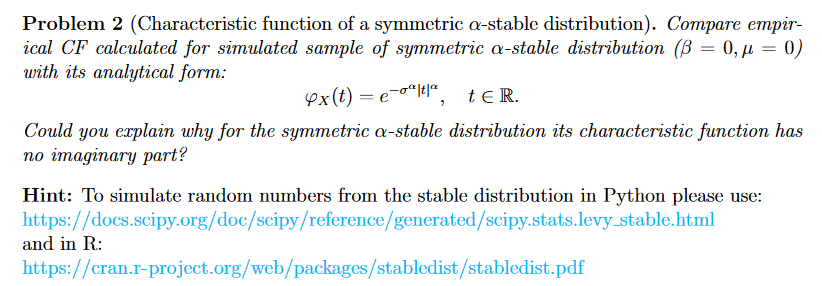

lecture: $S_{\alpha} (\sigma, \beta, \mu)$

pythą: $S(\alpha, \beta, \mu, c=\sigma)$

Nolan: $S(\alpha, \gamma=\sigma, \beta, \delta=\mu)$

In [13]:
alpha = 1.5
sigm = 5
beta = 1
mu = 10
n = 10000

In [15]:
X = levy_stable.rvs(alpha, beta, loc=mu, scale=sigm, size=n)

{'whiskers': [<matplotlib.lines.Line2D at 0x2af1f4975b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2af1f497c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af1f4972b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2af1f4a5130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af1f4a5400>],
 'means': []}

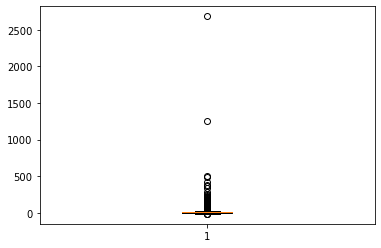

In [16]:
plt.boxplot(X)

In [17]:
np.mean(X)

9.686946879755931

In [19]:
alpha = 1.5
sigm = 2
beta = 0
mu = 0
n = 10000

In [20]:
X = levy_stable.rvs(alpha, beta, loc=mu, scale=sigm, size=n)

In [38]:
xs = np.linspace(-3, 3, 10000)

In [39]:
def cf(t):
    return np.exp(-sigm**alpha * np.abs(t)**alpha)

In [40]:
def ecf(t):
    return (1/n) * sum([np.exp(t*1j*X[i]) for i in range(n)])

In [41]:
ys1 = cf(xs)

In [42]:
ys2 = ecf(xs)

In [43]:
ys2_real = np.real(ys2)

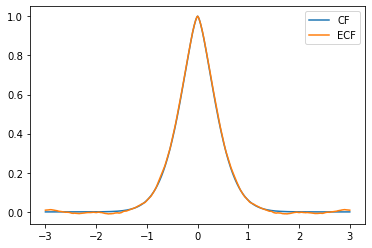

In [44]:
plt.plot(xs, ys1, label="CF")
plt.plot(xs, ys2_real, label="ECF")
plt.legend()